In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [65]:
# Load the dataset
data = pd.read_csv('regional_inequality_data.csv')


In [67]:
# Check the first few rows to understand the structure of the data
print(data.head())

        Entity Code  Year  GDP per capita 145446-annotations
0  Afghanistan  AFG  1950          1156.0                NaN
1  Afghanistan  AFG  1951          1170.0                NaN
2  Afghanistan  AFG  1952          1189.0                NaN
3  Afghanistan  AFG  1953          1240.0                NaN
4  Afghanistan  AFG  1954          1245.0                NaN


In [69]:
# Handle infinite values (if any) by replacing them with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)


In [71]:
# Check and handle missing values (NaN) in the dataset
print(data.isnull().sum())


Entity                    0
Code                    382
Year                      0
GDP per capita            0
145446-annotations    19857
dtype: int64


In [73]:
# For numeric columns, replace NaNs with the mean value of that column
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())


In [75]:
# For categorical columns, replace NaNs with the most frequent value (mode)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Step 3: Encode all categorical columns using LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to all categorical columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [77]:
#Clip the 'GDP per capita' column to remove any extreme values
upper_limit = 1e6  # for Example any GDP values above 1 million are clipped
data['GDP per capita'] = data['GDP per capita'].clip(upper=upper_limit)


In [79]:
#Defining features and targets
X = data.drop(columns=['GDP per capita'])  # Features
y = data['GDP per capita']  # Target

In [81]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train a Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 1955.0663556645393
R² Score: 0.8618494462675906


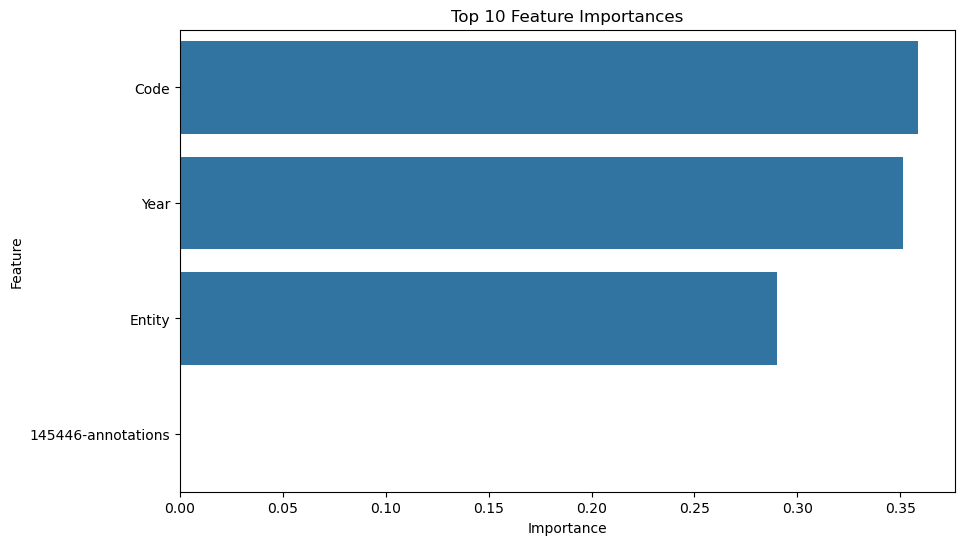

In [83]:
#Plot the feature importance for GradientBoostingRegressor
importances = model.feature_importances_

# Creating a DataFrame to hold the features and their importance
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()


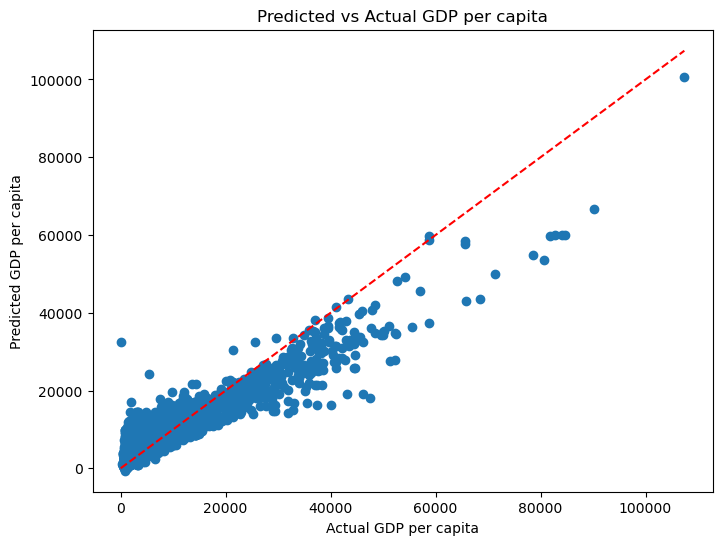

In [85]:
#Plot Predicted vs Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual GDP per capita')
plt.ylabel('Predicted GDP per capita')
plt.title('Predicted vs Actual GDP per capita')
plt.show()